In [275]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy import Nominatim
import folium
from branca.colormap import LinearColormap, StepColormap

%matplotlib inline


In [2]:
df = pd.read_csv('./data/rew_ca_van_clean.csv')

In [3]:
df.head()

,address,price,link,bed,bath,sqft,type
0,207-1545 E 2nd Avenue,398000,https://www.rew.ca/properties/R2227910/207-154...,1,1,602,Apt/Condo
1,772 E 37th Avenue,1580000,https://www.rew.ca/properties/R2227935/772-e-3...,7,3,2184,House
2,1207-788 Richards Street,800000,https://www.rew.ca/properties/R2228355/1207-78...,1,1,617,Apt/Condo
3,28 E 60th Avenue,2388000,https://www.rew.ca/properties/R2228401/28-e-60...,8,6,2962,House
4,309-2565 Maple Street,1998000,https://www.rew.ca/properties/R2228225/309-256...,3,3,1573,Apt/Condo


In [4]:
df.describe()

,price,bed,bath,sqft
count,5.000000e+02,500.000000,500.00000,500.000000
mean,2.558718e+06,3.238000,2.76600,1912.094000
std,3.326944e+06,2.075083,1.74394,1524.623661
min,2.250000e+05,0.000000,0.00000,0.000000
25%,9.335000e+05,2.000000,2.00000,894.250000
50%,1.618500e+06,3.000000,2.00000,1466.000000
75%,2.888000e+06,5.000000,4.00000,2457.000000
max,3.500000e+07,12.000000,8.00000,12619.000000


## Let's use geocoding to get latlng coords of each house and add that to our DataFrame. We'll use these for visualizing on map later.

In [15]:
geocoder = Nominatim()
def address_to_latlng(address: str, num_retries: int = 3) -> tuple:
    """
    Convert an address to a point in LatLng with geocoding
    """
    print("search for {}".format(address))
    for i in range(num_retries):
        try:
            location = geocoder.geocode(query=address + ', Vancouver BC')
        except Exception as e:
            time.sleep(2)
            print("Error: {}. Retrying...({} retries left)".format(e, num_retries - i - 1))
            continue
        break
        
    if location is not None:
        print("found {}".format(location))
        return (location.latitude, location.longitude)
latlngs = []
for address in df['address']:
    latlng = address_to_latlng(address=address)
    latlngs.append(latlng)


search for 207-1545 E 2nd Avenue
search for 772 E 37th Avenue
found East 37th Avenue, Riley Park, Vancouver, Metro Vancouver, British Columbia, V5W, Canada
search for 1207-788 Richards Street
search for 28 E 60th Avenue
found East 60th Avenue, Sunset, Vancouver, Metro Vancouver, British Columbia, V5X, Canada
search for 309-2565 Maple Street
search for 2095 W 35th Avenue
found West 35th Avenue, Shaughnessy, Vancouver, Metro Vancouver, British Columbia, V6M, Canada
search for 307-1088 Quebec Street
search for 208-1099 E Broadway
search for 4353 Fleming Street
found Fleming Street, Victoria-Fraserview, Vancouver, Metro Vancouver, British Columbia, V5P, Canada
search for 227 E 62nd Avenue
found East 62nd Avenue, Victoria-Fraserview, Vancouver, Metro Vancouver, British Columbia, V5P, Canada
search for 972 W 16th Avenue
found West 16th Avenue, South Granville, Shaughnessy, Vancouver, Metro Vancouver, British Columbia, V6J, Canada
search for 1507-1295 Richards Street
search for 402-5488 Cecil

found West 6th Avenue, Cambie Village, Fairview, Vancouver, Metro Vancouver, British Columbia, V5Z, Canada
search for 2018 Quilchena Crescent
found Quilchena Crescent, Kerrisdale, Vancouver, Metro Vancouver, British Columbia, V6M, Canada
search for 5029 Payne Street
found Payne Street, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 215 E 64th Avenue
found East 64th Avenue, Sunset, Vancouver, Metro Vancouver, British Columbia, V5X, Canada
search for 601-1690 W 8th Avenue
search for 402-1819 W 5th Avenue
search for 204-1835 Morton Avenue
search for TH 15-550 Taylor Street
search for 3105-1239 W Georgia Street
search for 1811 E Kent Avenue
search for 5023 Payne Street
found Payne Street, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 3354 Monmouth Avenue
found Monmouth Avenue, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 1838 W 12th Avenue
found West 12th Avenue, Cambie Village, Fairview, Vancouver, Metro Vancouver, Briti

found Southeast Marine Drive, Victoria-Fraserview, Vancouver, Metro Vancouver, British Columbia, V5P, Canada
search for 3242 Clive Avenue
found Clive Avenue, Killarney, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 3220 Clive Avenue
found Clive Avenue, Killarney, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 488 E 15 Avenue
search for 3240 Clive Avenue
found Clive Avenue, Killarney, Vancouver, Metro Vancouver, British Columbia, V5R, Canada
search for 2305-289 Drake Street
search for 3103 St. George Street
found St George Street, Riley Park, Vancouver, Metro Vancouver, British Columbia, V5V, Canada
search for 7359 Pinnacle Court
found Pinnacle Court, Champlain Heights, Vancouver, Metro Vancouver, British Columbia, V5S, Canada
search for 1602-667 Howe Street
search for 1527 Atlas Lane
search for 1542 W 64th Avenue
found West 64th Avenue, Marpole, Vancouver, Metro Vancouver, British Columbia, V6P, Canada
search for 2861 W 13th Avenue
found Wes

found West 38th Avenue, Cambie Village, South Cambie, Vancouver, Metro Vancouver, British Columbia, V5Z, Canada
search for 502-5868 Agronomy Road
search for 1955 Alberni Street
found 1955, Alberni Street, Davie Village, Coal Harbour, Vancouver, Metro Vancouver, British Columbia, V6G, Canada
search for 5880 Crown Street
found Crown Street, Point Grey, Vancouver, Metro Vancouver, British Columbia, V6R 3W6, Canada
search for 5738 Wallace Street
found Wallace Street, Point Grey, Vancouver, Metro Vancouver, British Columbia, V6R, Canada
search for 4378 Knight Street
found Knight Street, Kensington-Cedar Cottage, Vancouver, Metro Vancouver, British Columbia, V5N, Canada
search for 104-4696 W 10th Avenue
search for 722 W 68th Avenue
found West 68th Avenue, Marpole, Vancouver, Metro Vancouver, British Columbia, V6P, Canada
search for 305-1030 W Broadway
search for 2061 E Broadway Avenue
search for 2083 E 48th Avenue
found East 48th Avenue, Killarney, Vancouver, Metro Vancouver, British Columbi

search for 3994 W 30th Avenue
found West 30th Avenue, Arbutus Ridge, Vancouver, Metro Vancouver, British Columbia, V6L, Canada
search for 1801-1003 Pacific Street
search for 2355 E 41st Avenue
found East 41st Avenue, Victoria-Fraserview, Vancouver, Metro Vancouver, British Columbia, V5P, Canada
search for 3401-499 Pacific Street
search for 201-1230 Comox Street
search for 8407 Osler Street
found Osler Street, Marpole, Vancouver, Metro Vancouver, British Columbia, V6P, Canada
search for 328-3563 Ross Drive
search for 2843 E 20th Avenue
found East 20th Avenue, Kensington-Cedar Cottage, Vancouver, Metro Vancouver, British Columbia, V5N, Canada
search for 1860 Graveley Street
found Graveley Street, Hastings-Sunrise, Vancouver, Metro Vancouver, British Columbia, V5K, Canada
search for PH6-2220 NE Kingsway
search for 2942 E Georgia Street
found East Georgia Street, Hastings-Sunrise, Vancouver, Metro Vancouver, British Columbia, V5K, Canada
search for 1169 W 73rd Avenue
found West 73rd Avenue

search for 3555 W King Edward Avenue
found 3555, West King Edward Avenue, Dunbar, Vancouver, Metro Vancouver, British Columbia, V6R3S5, Canada
search for 2104-1335 Howe Street
search for 2402-1335 Howe Street
search for 313-1239 Kingsway
search for 6485 Adera Street
found Adera Street, Marpole, Vancouver, Metro Vancouver, British Columbia, V6P, Canada
search for 6730 Laurel Street
found Laurel Street, Cambie Village, Fairview, Vancouver, Metro Vancouver, British Columbia, V5Z, Canada
search for 1722 W 68th Avenue
found West 68th Avenue, Marpole, Vancouver, Metro Vancouver, British Columbia, V6P, Canada
search for 4230 Nautilus Close
found Nautilus Close, Point Grey, Vancouver, Metro Vancouver, British Columbia, V6R, Canada
search for 4673 W 8th Avenue
found West 8th Avenue, Point Grey, Vancouver, Metro Vancouver, British Columbia, V6R, Canada
search for 2393 W 6th Avenue
found West 6th Avenue, Cambie Village, Fairview, Vancouver, Metro Vancouver, British Columbia, V5Z, Canada
search fo

In [256]:
df['latlng'] = latlngs
df.head()

,address,price,link,bed,bath,sqft,type,latlng
0,207-1545 E 2nd Avenue,398000,https://www.rew.ca/properties/R2227910/207-154...,1,1,602,Apt/Condo,None
1,772 E 37th Avenue,1580000,https://www.rew.ca/properties/R2227935/772-e-3...,7,3,2184,House,"(49.2372347, -123.1016318)"
2,1207-788 Richards Street,800000,https://www.rew.ca/properties/R2228355/1207-78...,1,1,617,Apt/Condo,None
3,28 E 60th Avenue,2388000,https://www.rew.ca/properties/R2228401/28-e-60...,8,6,2962,House,"(49.2157584, -123.0971635)"
4,309-2565 Maple Street,1998000,https://www.rew.ca/properties/R2228225/309-256...,3,3,1573,Apt/Condo,None


## Let's organize our variables into numerical (quantitative) and categorical (qualitative)

In [258]:
quantitative_vars = ['price', 'bed', 'bath', 'sqft']
qualitative_vars = ['address', 'type']

## Get stats for all of the data

In [41]:
df.describe()

,price,bed,bath,sqft
count,5.000000e+02,500.000000,500.00000,500.000000
mean,2.558718e+06,3.238000,2.76600,1912.094000
std,3.326944e+06,2.075083,1.74394,1524.623661
min,2.250000e+05,0.000000,0.00000,0.000000
25%,9.335000e+05,2.000000,2.00000,894.250000
50%,1.618500e+06,3.000000,2.00000,1466.000000
75%,2.888000e+06,5.000000,4.00000,2457.000000
max,3.500000e+07,12.000000,8.00000,12619.000000


## Wow, very large maximum albeit not suprising.  Let's have a closer look at the distribution of pricing

In [241]:
df.price.describe()

count    5.000000e+02
mean     2.558718e+06
std      3.326944e+06
min      2.250000e+05
25%      9.335000e+05
50%      1.618500e+06
75%      2.888000e+06
max      3.500000e+07
Name: price, dtype: float64

### Plot histogram of prices

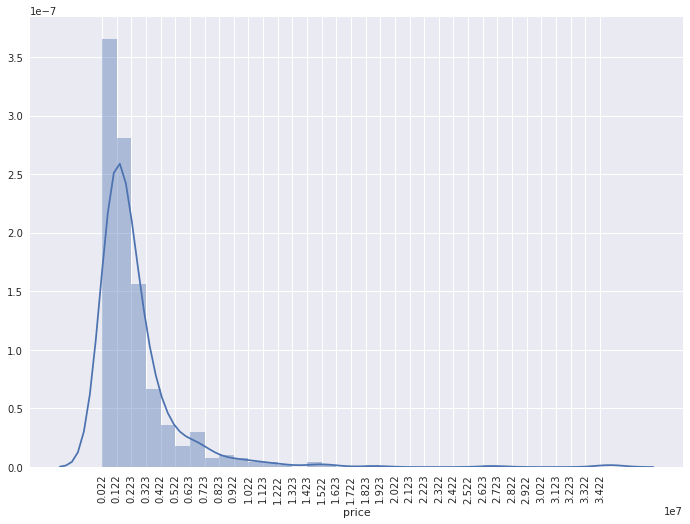

In [248]:
def plot_prices(df: pd.DataFrame):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    fig, ax = plt.subplots()
    bins = range(int(df.price.min()),int(df.price.max()),1000000)
    ax.set_xticks(bins)
    plt.xticks(rotation='vertical')
    return sns.distplot(df.price, bins=bins)
plot_prices(df)

### Definitely a skewed distribution, looks as if we have a few outliers at the higher range of the prices. Check the skewness and kurtosis

In [243]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

Skewness: 5.472418
Kurtosis: 42.640061


## Plot with outliers removed

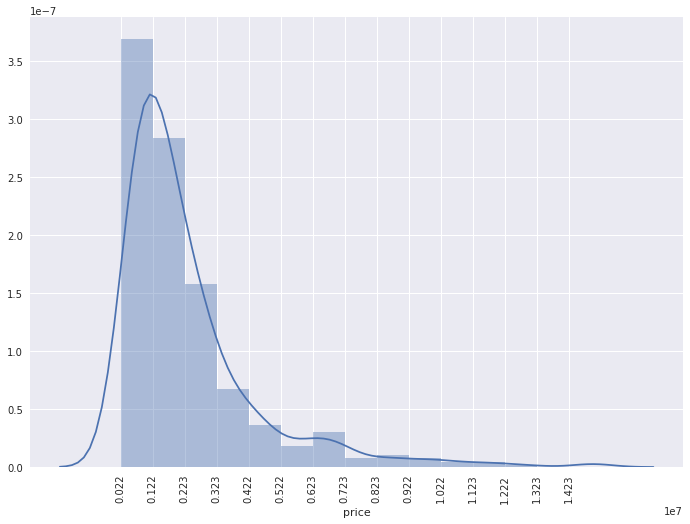

In [250]:
plot_prices(df[df.price < 15e6])

## Plot data on a slippy map to see locations of housing

In [244]:
m = folium.Map(location=df['latlng'][1])
colors = ['gray', 'green','blue','red','orange', 'yellow']
colormap = StepColormap(colors=colors,vmin=5e5, vmax=10e6, caption='price')
m.add_child(colormap)
for i, latlng in enumerate(df['latlng']):
    price = df.loc[i, 'price']
    if latlng is not None:
        display_html = pd.DataFrame(df.loc[i, :]).to_html()
        style = {'fillColor': colormap(price),
                'color' : colormap(price)}
        p = geojson.Point(coordinates=(latlng[1], latlng[0]), style=style)
        html_info = pd.DataFrame(df.loc[i,:]).to_html()
        m.add_child(folium.Marker(location=latlng, icon=folium.Icon(color='black', icon_color=colormap(price)), popup=folium.Popup(html=html_info)))
m

## As expected, we see higher pricing closer to downtown with lower prices on the outer regions

## Next, let's see how some of the variables interact with the list price

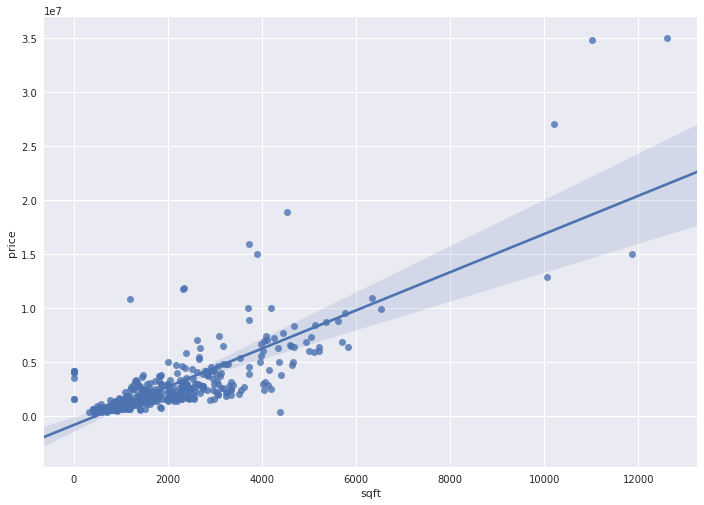

In [251]:
#ssqft/saleprice
var = 'sqft'
sns.regplot(df[var], df['price'], )

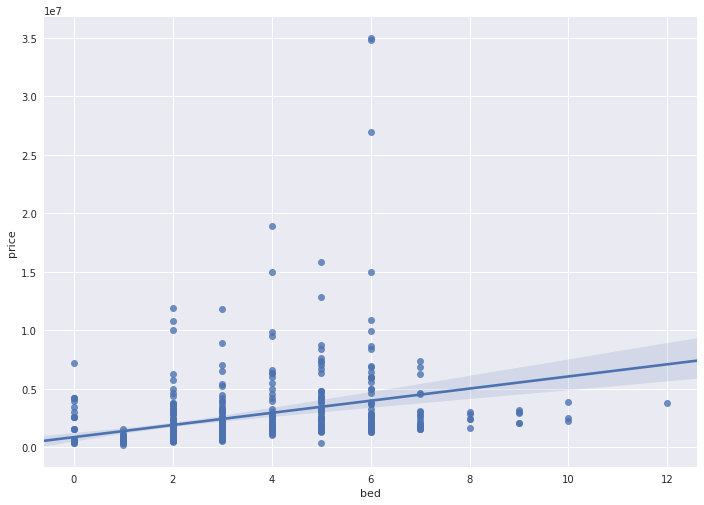

In [259]:
var = 'bed'
sns.regplot(df[var], df['price'], )

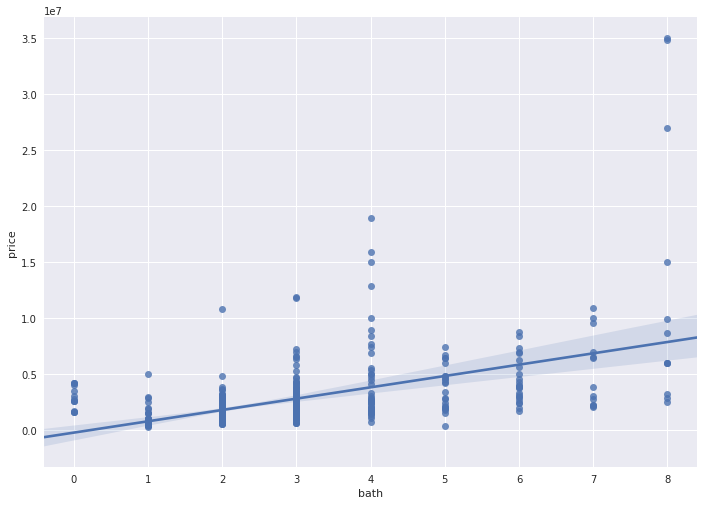

In [260]:
var = 'bath'
sns.regplot(df[var], df['price'], )

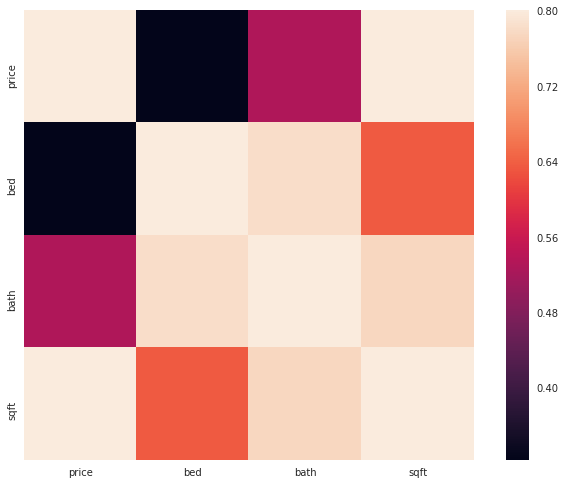

In [262]:
corrmat = df.corr()
sns.heatmap(corrmat, vmax=.8, square=True);

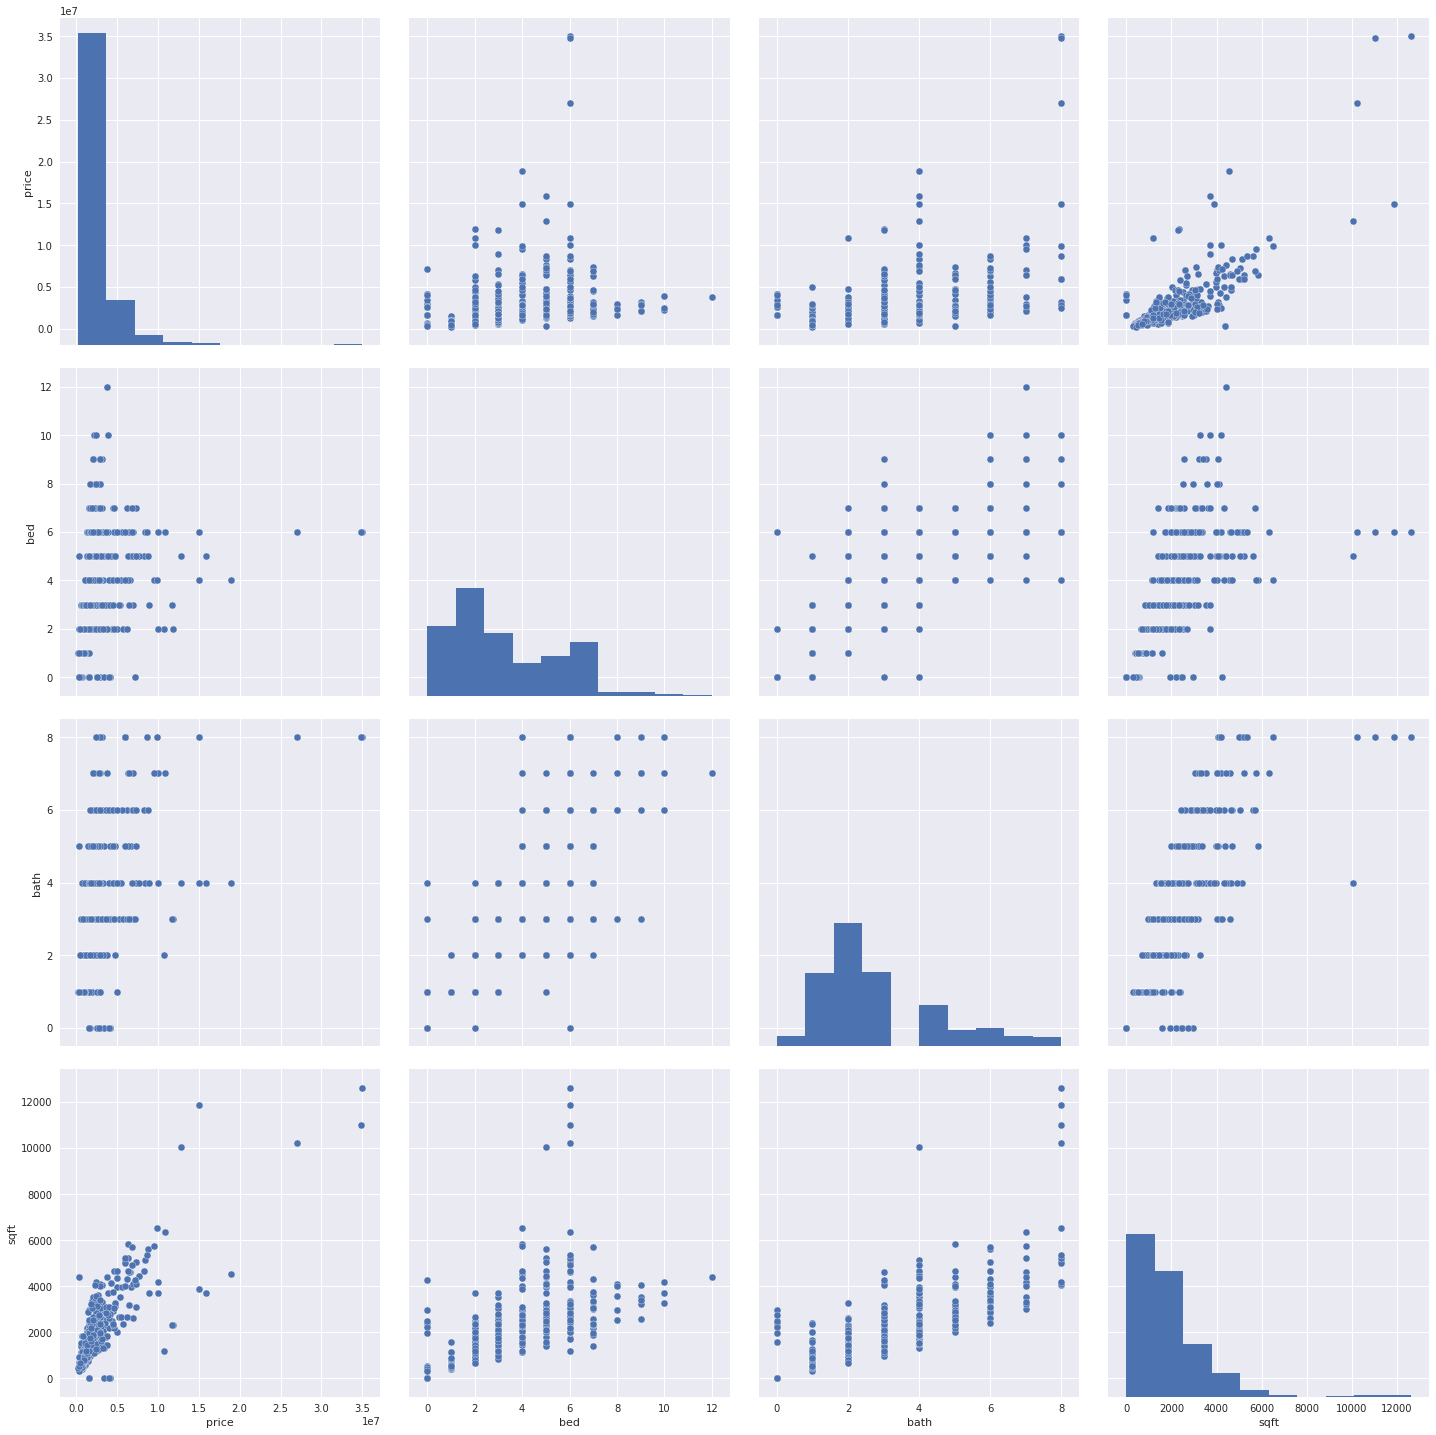

In [265]:
sns.pairplot(df, size = 5)

In [273]:
df.latlng.isnull().sum()

233